In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


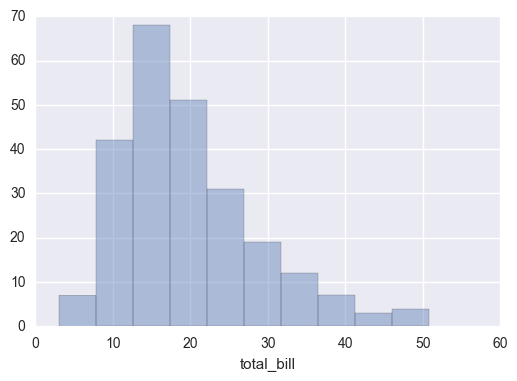

In [12]:
sns.distplot(tips['total_bill'],kde=False,bins=10)

C:\Program Files\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


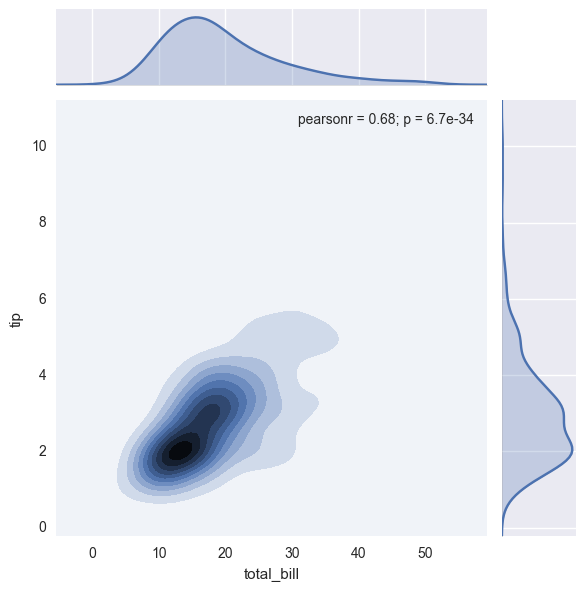

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

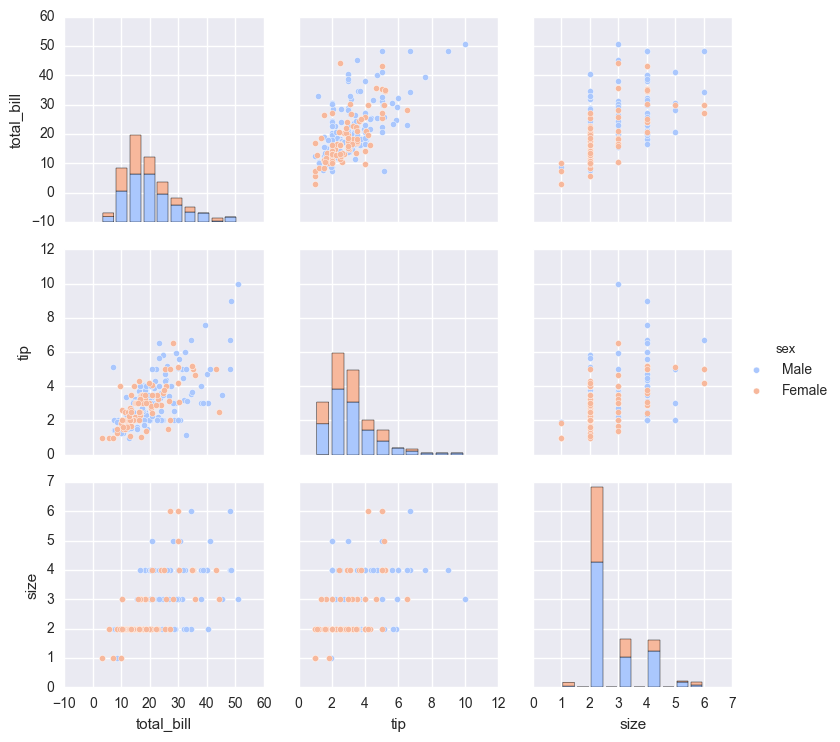

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

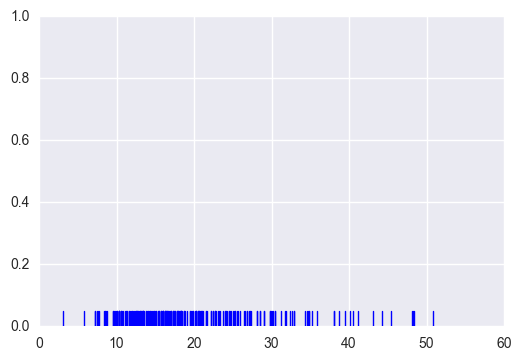

In [21]:
sns.rugplot(tips['total_bill'])

(0, 1)

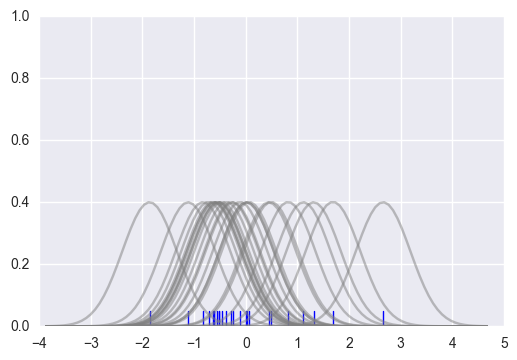

In [22]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

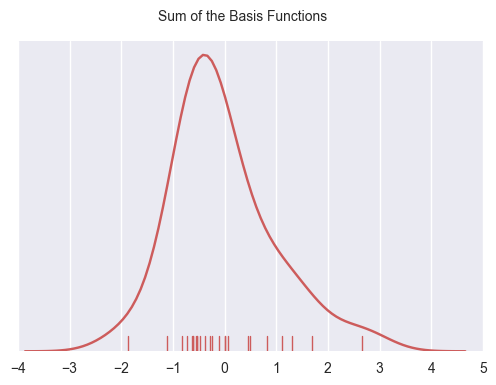

In [23]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

C:\Program Files\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


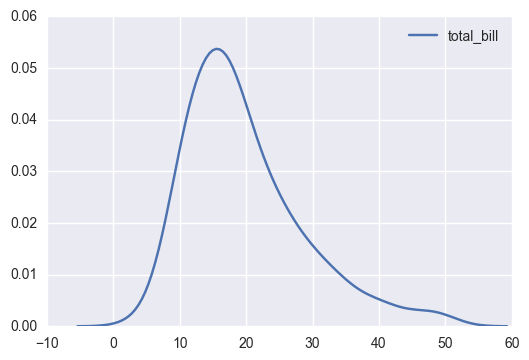

In [24]:
sns.kdeplot(tips['total_bill'])

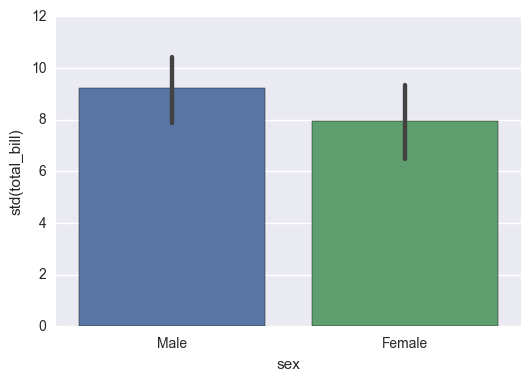

In [26]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

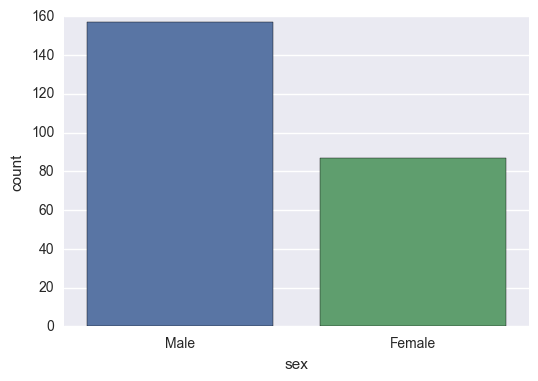

In [27]:
sns.countplot(x='sex',data=tips)

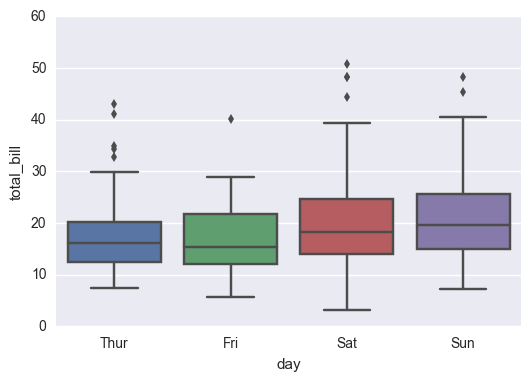

In [28]:
sns.boxplot(x='day',y='total_bill',data=tips)

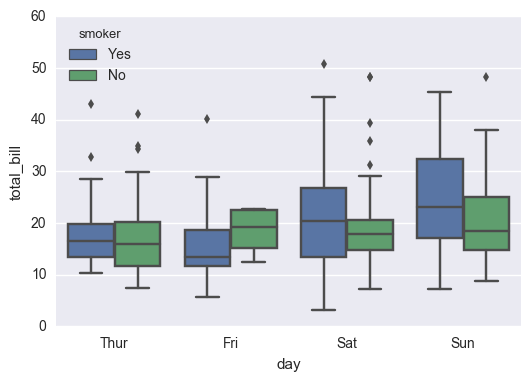

In [29]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

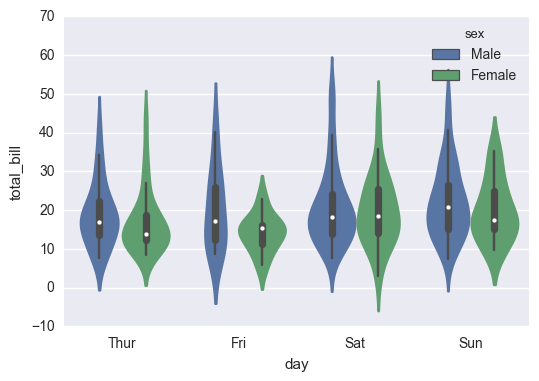

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex')

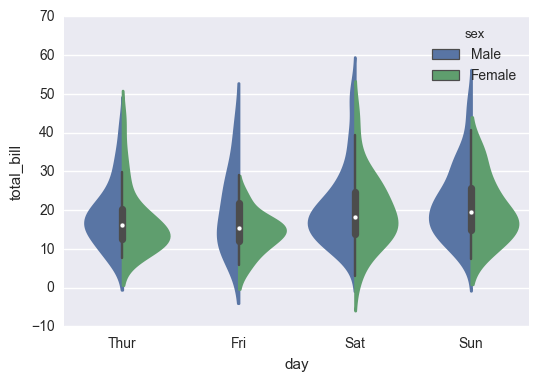

In [33]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True)

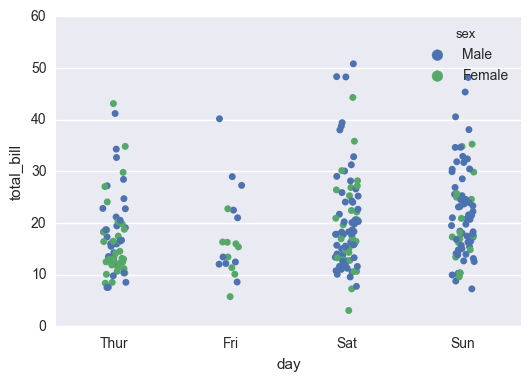

In [36]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

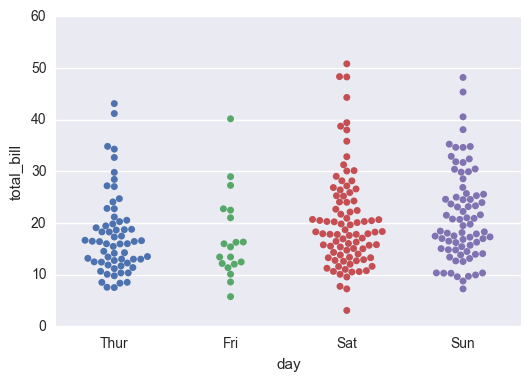

In [37]:
sns.swarmplot(x='day',y='total_bill',data=tips)

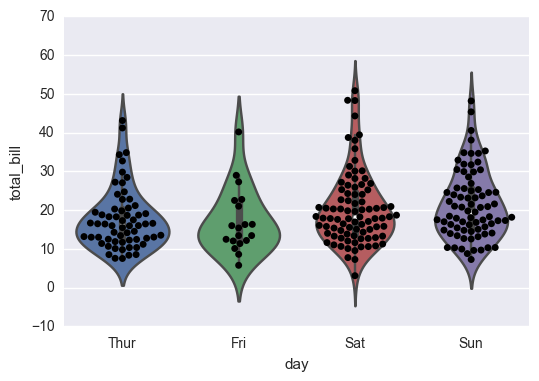

In [38]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

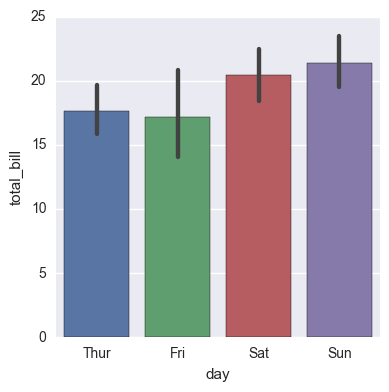

In [40]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

In [41]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
tc=tips.corr()

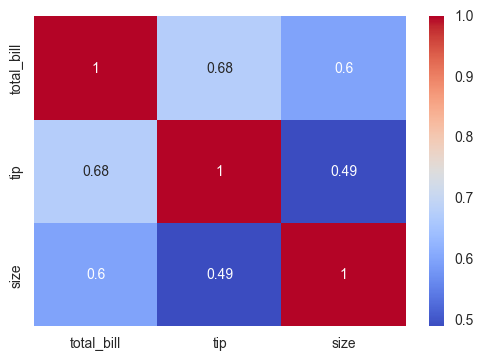

In [52]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [55]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

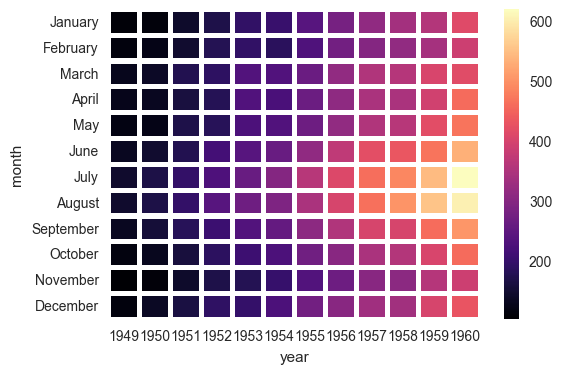

In [58]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=3)

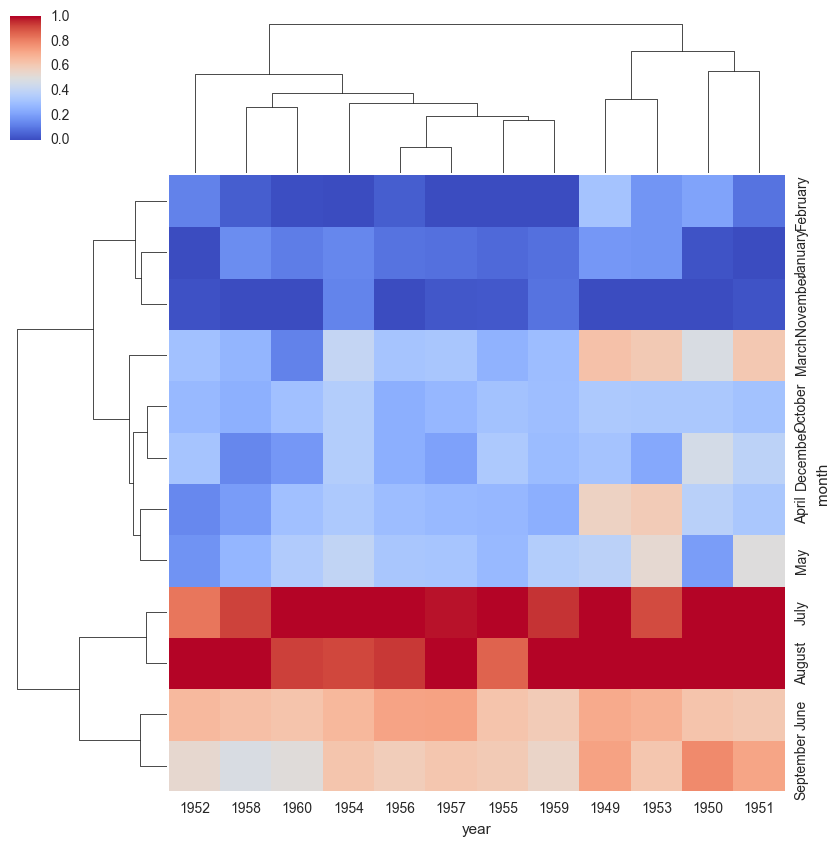

In [63]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

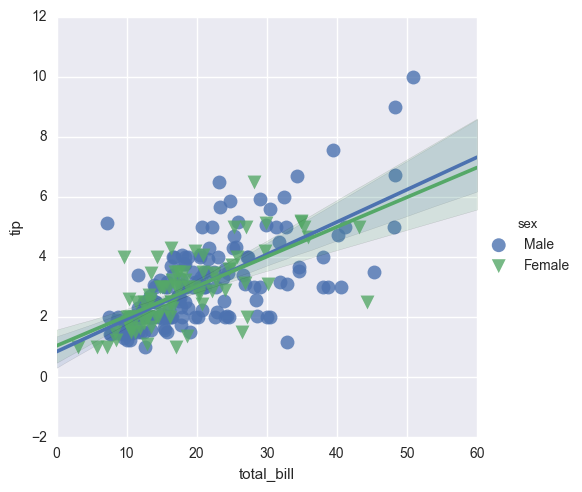

In [68]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

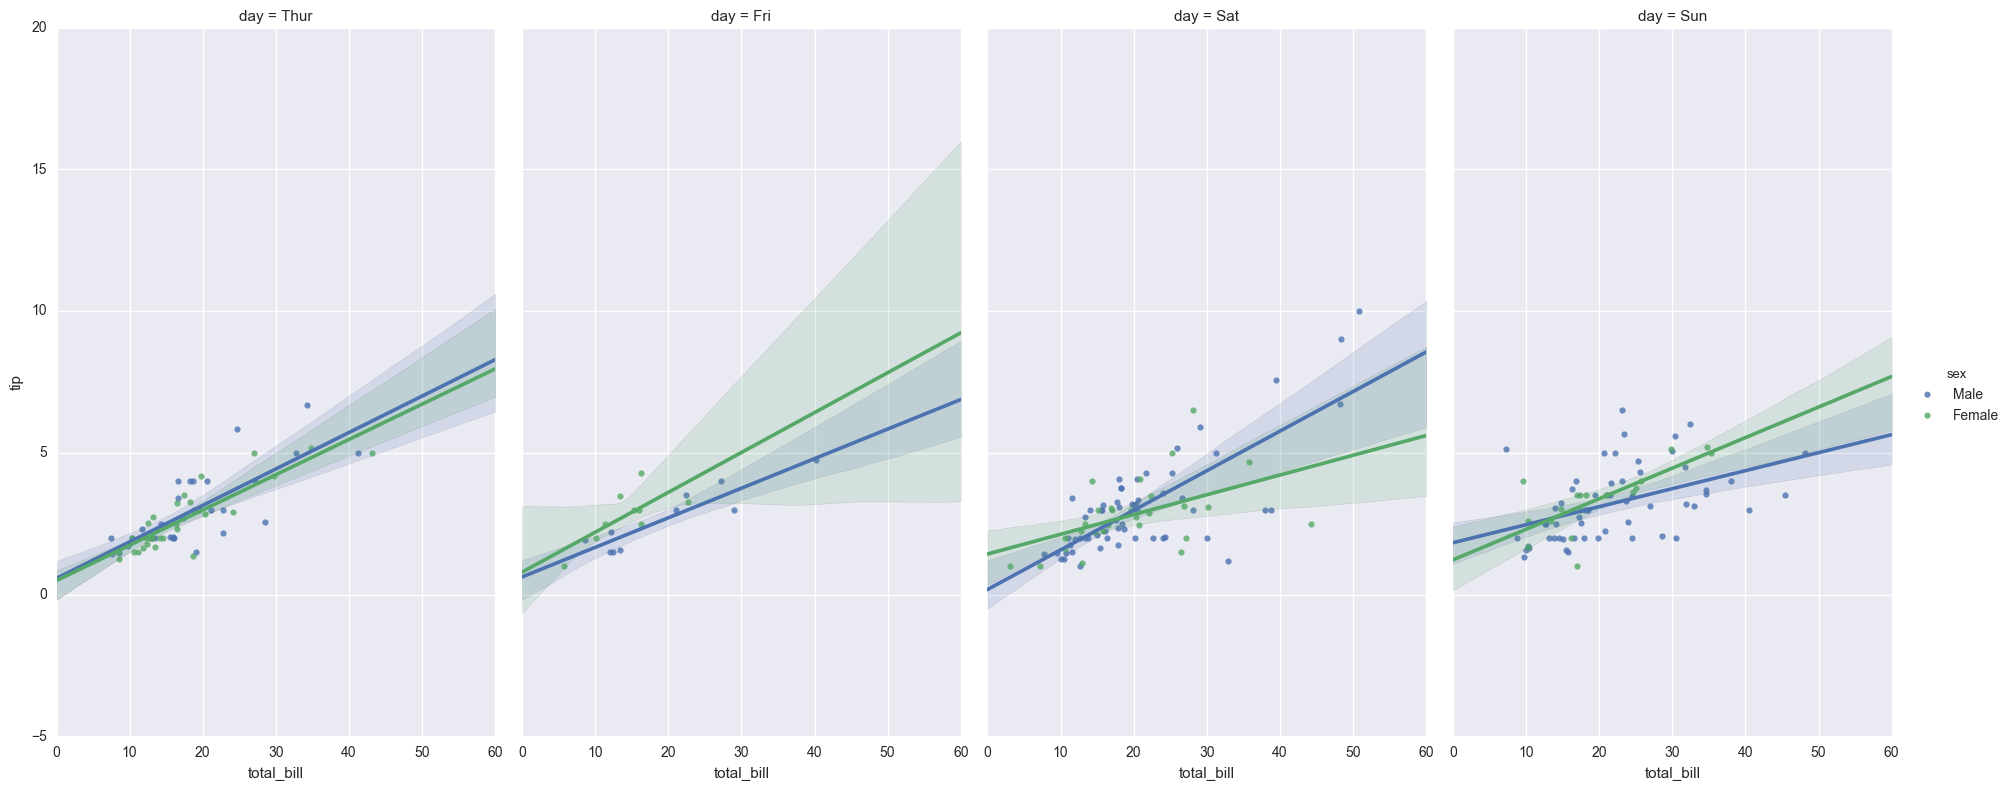

In [73]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8)

In [74]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


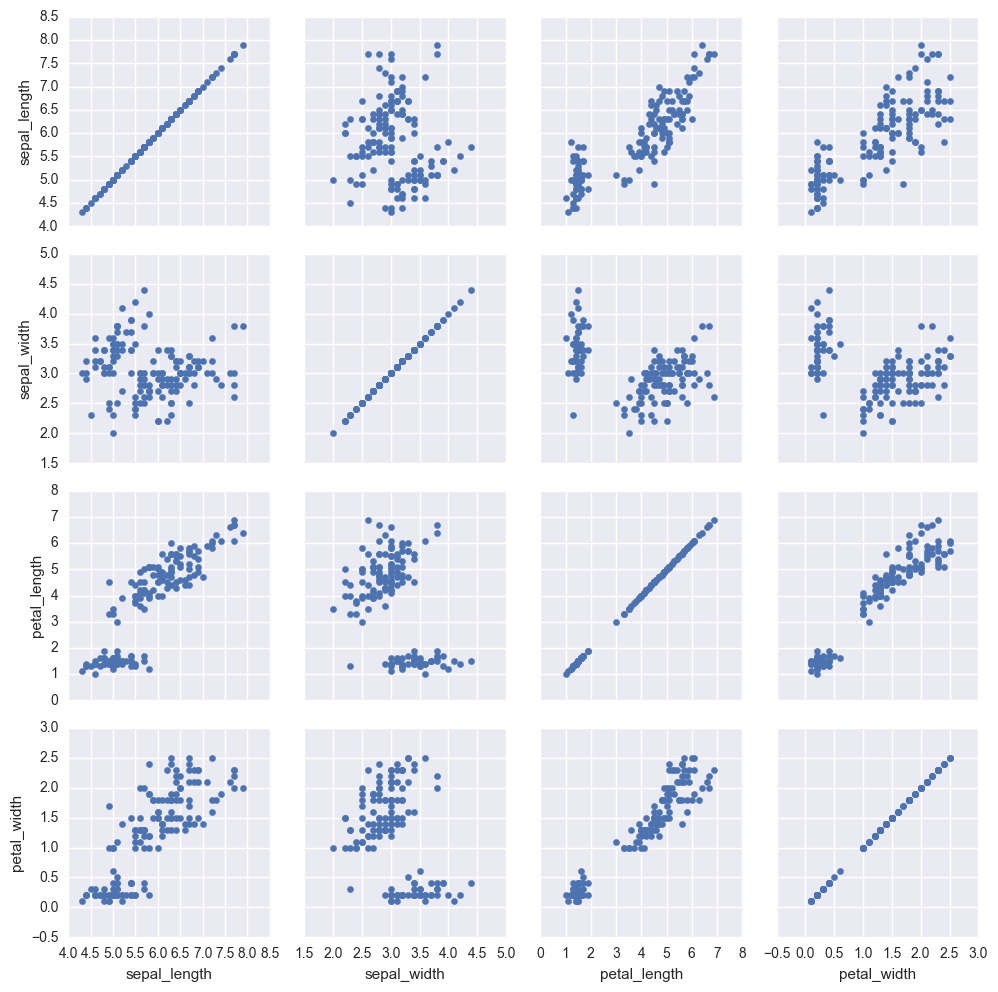

In [78]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

C:\Program Files\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


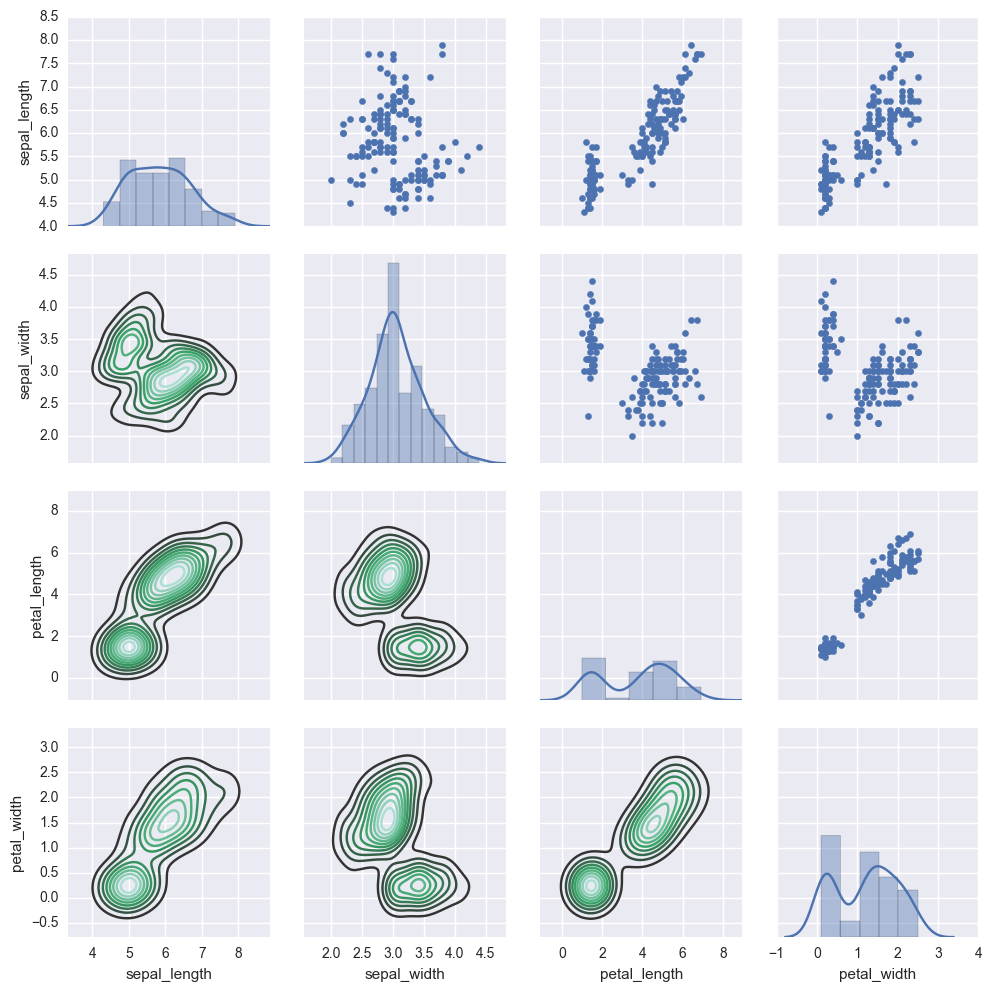

In [83]:
g=sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

C:\Program Files\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


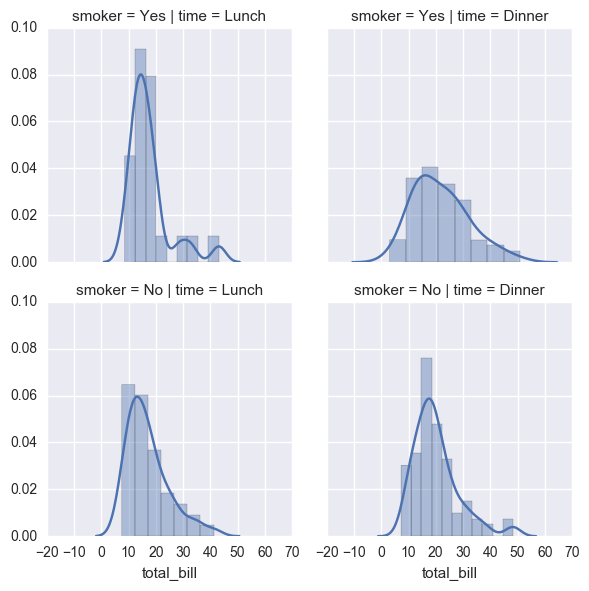

In [86]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

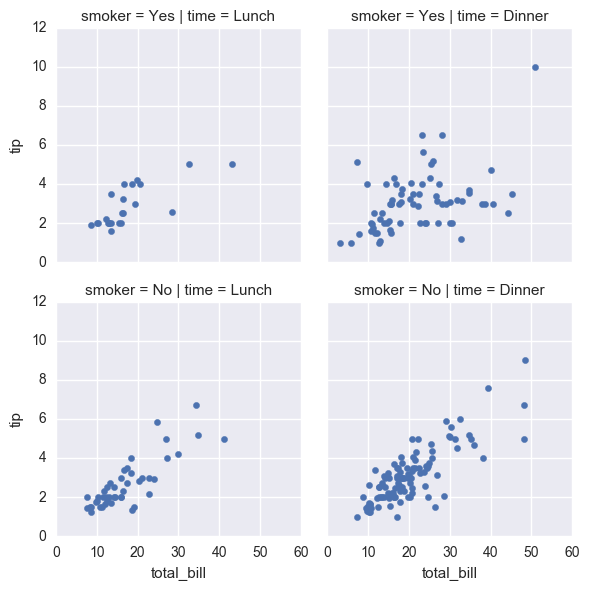

In [87]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

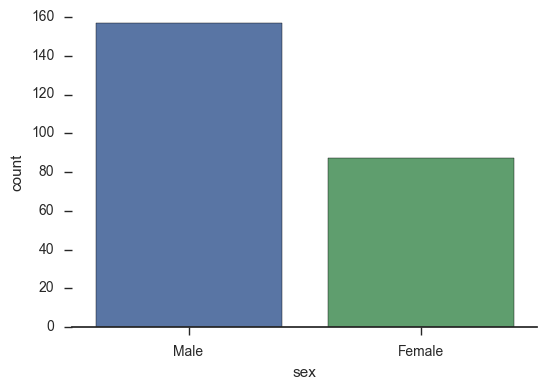

In [92]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

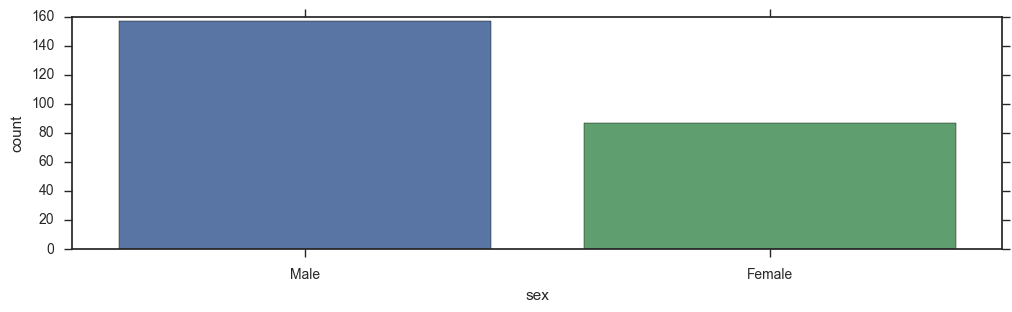

In [93]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

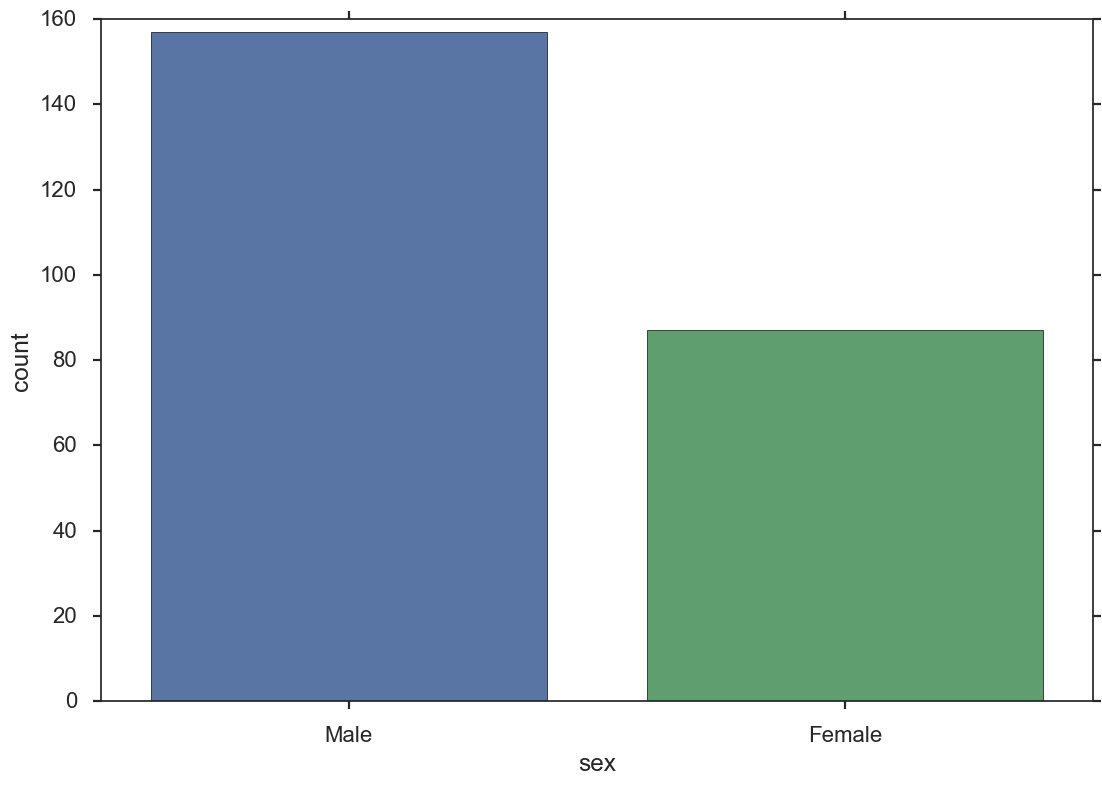

In [94]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

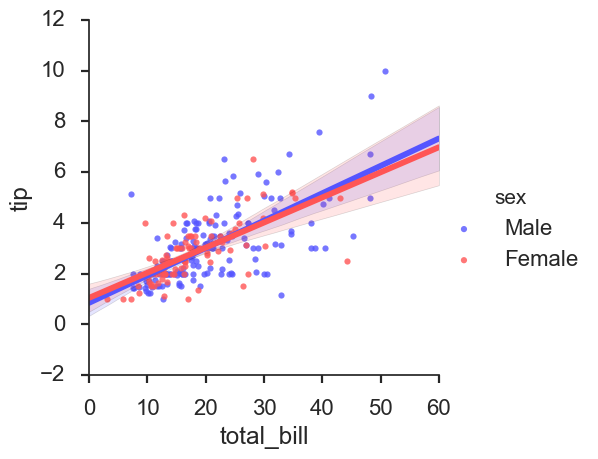

In [97]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')